<a href="https://colab.research.google.com/github/imran4668/netlify-alchemy-dapp-boilerplates/blob/main/IBM(NAAN_MUDHALVAN)FAKE_NEWS_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Importing Libraries and Load the Dataset :

In [14]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np # Corrected 'a' to 'np'
import pandas as pd # Corrected 'a' to 'pd'
import seaborn as sns
import matplotlib.pyplot as plt # Corrected 'a' to 'plt'
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS # Corrected import statement
from nltk.stem import WordNetLemmatizer # Corrected import statement
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup # Corrected import statement
import re
import string
import unicodedata
from keras.preprocessing import text, sequence # Corrected import statement
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
true = pd.read_csv('/content/drive/MyDrive/IBM (NAAN MUDHALVAN) FAKE/archive/True.csv')
false = pd.read_csv("/content/drive/MyDrive/IBM (NAAN MUDHALVAN) FAKE/archive/Fake.csv")
print(true.head())
print(false.head())
true['category'] = 1
false['category'] = 0
df = pd.concat([true, false])
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Step 2: Preprocessing data:

In [15]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Download the 'stopwords' corpus
nltk.download('stopwords')

# Define or load 'true' and 'false' DataFrames here
# ...

df = pd.concat([true, false])

# Define text preprocessing functions as you did

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub(r'\[[^]]*\]', '', text)

def remove_urls(text):
    return re.sub(r'http\S+', '', text)

def lowercase_text(text):
    return text.lower()

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    final_text = [word for word in text.split() if word.lower() not in stop_words]
    return " ".join(final_text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_urls(text)
    text = lowercase_text(text)
    text = remove_stopwords(text)
    return text

# Apply the denoise_text function to the 'text' column in your DataFrame
df['text'] = df['text'].apply(denoise_text)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Display the cleaned DataFrame, training, and testing sets
print("Cleaned DataFrame:")
print(df)
print("\nTraining Set:")
print(X_train_tfidf)
print("\nTesting Set:")
print(X_test_tfidf)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-15-7f3dc58f5b68>:20: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-15-7f3dc58f5b68>:20: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Cleaned DataFrame:
                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      washington (reuters) - head conservative repub...  politicsNews   
1      washington (reuters) - transgender people allo...  politicsNews   
2      washington (reuters) - special 

Text Preprocessing :

In [16]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
# Load the true and fake news datasets
true = pd.read_csv('/content/drive/MyDrive/IBM (NAAN MUDHALVAN) FAKE/archive/True.csv')
false = pd.read_csv('/content/drive/MyDrive/IBM (NAAN MUDHALVAN) FAKE/archive/Fake.csv')
true['category'] = 1
false['category'] = 0
# Concatenate the datasets into a single DataFrame
df = pd.concat([true, false])
# Function to strip HTML tags
def strip_html(text):
 soup = BeautifulSoup(text, "html.parser")
 return soup.get_text()
# Function to remove text between square brackets
def remove_between_square_brackets(text):
 return re.sub(r'\[[^]]*\]', '', text)
# Function to remove URLs
def remove_urls(text):
 return re.sub(r'http\S+', '', text)
# Function to lowercase text
def lowercase_text(text):
 return text.lower()
# Function to remove stopwords using NLTK
def remove_stopwords(text):
 stop_words = set(stopwords.words('english'))
 final_text = [word for word in text.split() if word.lower() not in stop_words]
 return " ".join(final_text)
# Function to denoise text
def denoise_text(text):
 text = strip_html(text)
 text = remove_between_square_brackets(text)
 text = remove_urls(text)
 text = lowercase_text(text)
 text = remove_stopwords(text)
 return text
# Apply denoise_text function to the 'text' column in the DataFrame
df['text'] = df['text'].apply(denoise_text)
print("Cleaned DataFrame:")
print(df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-16-c19042141979>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
<ipython-input-16-c19042141979>:19: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Cleaned DataFrame:
                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      washington (reuters) - head conservative repub...  politicsNews   
1      washington (reuters) - transgender people allo...  politicsNews   
2      washington (reuters) - special 

Feature Extraction :

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'],
test_size=0.2, random_state=42)
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000) # You can adjust
#max_features based on your dataset
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print("\nTraining Set:")
print(X_train_tfidf)
print("\nTesting Set:")
print(X_test_tfidf)



Training Set:
  (0, 4780)	0.04055388580993615
  (0, 2093)	0.08177211175159756
  (0, 1539)	0.09119450928304809
  (0, 4981)	0.04190513462895716
  (0, 2183)	0.10422613461948078
  (0, 590)	0.05876200167251926
  (0, 28)	0.09426384652873977
  (0, 3566)	0.07249842525397802
  (0, 2174)	0.06096994326887225
  (0, 2695)	0.07263888002694749
  (0, 2853)	0.0824834059441714
  (0, 2665)	0.0603635146392653
  (0, 29)	0.09630416205990186
  (0, 3768)	0.08576244526890027
  (0, 4531)	0.05538877664854544
  (0, 294)	0.06602742063624757
  (0, 727)	0.04365070594910357
  (0, 643)	0.15834042676379798
  (0, 4559)	0.03746333028596199
  (0, 4390)	0.08045000702736776
  (0, 4532)	0.06528148498079173
  (0, 4681)	0.03779504597084814
  (0, 1744)	0.19020576055300634
  (0, 4574)	0.07237878387356704
  (0, 2841)	0.11503119098506681
  :	:
  (35917, 4118)	0.03596534119797707
  (35917, 3050)	0.033285413602077984
  (35917, 4940)	0.08720925067379534
  (35917, 4753)	0.06777115121550296
  (35917, 2585)	0.020654875194214942
  (3591

Model Training:

In [18]:
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc_model.fit(X_train_tfidf, y_train)
y_pred_rfc = rfc_model.predict(X_test_tfidf)


Model Evaluation

Accuracy: 0.9973273942093541


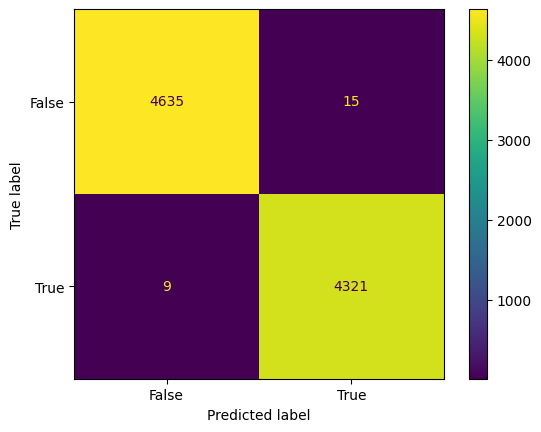

In [19]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rfc)
print(f"Accuracy: {accuracy}")
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rfc)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=[False, True])
cm_display.plot()
plt.show()


User Input for Prediction:

In [20]:
# Additional Function for Checking Value with User Input
def checking_our_value_with_input():
 user_input = input("Enter a text for fake news detection: ")
 user_input_denoised = denoise_text(user_input)
  # Apply the same preprocessing to user input
 user_input_tfidf = vectorizer.transform([user_input_denoised])
 prediction = rfc_model.predict(user_input_tfidf)
 print('Random Forest Classifier:', output(prediction))
# Function to output result
def output(n):
 if n == 1:
  return 'True news'
 else:
  return 'Fake news'
# Call the additional function with user input
checking_our_value_with_input()


Enter a text for fake news detection: FAKE NEWS DETECTION USING NLP
Random Forest Classifier: Fake news
